# Example of data analysis based on vehicles registrations in Luxembourg

The data is coming from SNCA and published as open data on data.public.lu:
https://data.public.lu/fr/datasets/parc-automobile-du-luxembourg/


Let's import the data from the last months.


In [ ]:
import requests
import re
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import time

### install
# Install libraries with the following command: pip install -r requirements.txt

### config

# your API key here
key = ''

# the id of the Dataset you want to get
datasetId = 'parc-automobile-du-luxembourg'

# the pattern filenames should match to be downloaded

#fPattern = '^Operations_Delta_\\d{6}.xml$'
#fPattern = '^Parc_Automobile_20220\\d.xml$'
fPattern = '^Parc_Automobile_202204.xml$'
### end config

url = 'https://data.public.lu/api/1/datasets/'+datasetId+'/'
headers = {'X-API-KEY': key}
r = requests.get(url, headers=headers)
r.raise_for_status()

resources = r.json()['resources']
data = []
columns = []
init = True
for i in range(len(resources)):
    if re.search(fPattern, resources[i]['title']):
        print('Downloading: '+ resources[i]['title'])
        dlStart = time.time()
        s = requests.get(resources[i]['url'], headers=headers)
        s.raise_for_status()
        dlEnd = time.time()
        print('Downloaded! download duration:', dlEnd-dlStart)
        print('Parsing...')
        xml = ET.fromstring(s.text)
        parseEnd = time.time()
        print('Parsed! parsing duration:', parseEnd-dlEnd)
        for operation in xml:
            row = []
            for field in operation:
                if init:
                    columns.append(field.tag)
                row.append(field.text)
            init = False
            data.append(row)
df = pd.DataFrame(data, columns=columns)



Ok now we have some data, let's filter to get only private cars

In [8]:
cars = df[df["CATSTC"] == "5"]

Let's find the most frequent colors of cars in Luxembourg on the given period of time.

<AxesSubplot:ylabel='COUL'>

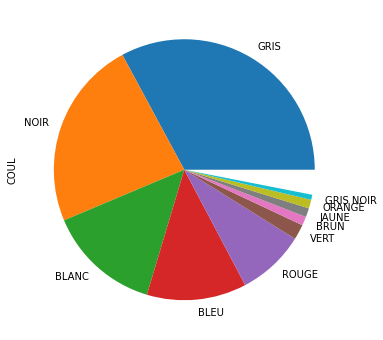

In [9]:
coul = cars['COUL'].value_counts(normalize=True).head(10)
coul.plot.pie(figsize=(6, 6))

Most frequent engine types

<AxesSubplot:>

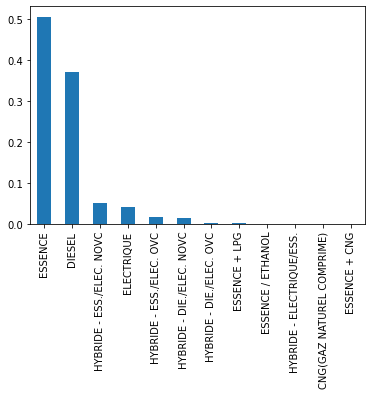

In [10]:
energy = cars['LIBCRB'].value_counts(normalize=True)
energy.plot.bar()

Most frequent brands

<AxesSubplot:>

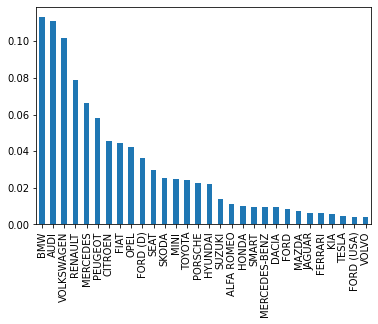

In [11]:
brand = cars['LIBMRQ'].value_counts(normalize=True).head(30)
brand.plot.bar()

Vehicles Frequency by CO2 emissions

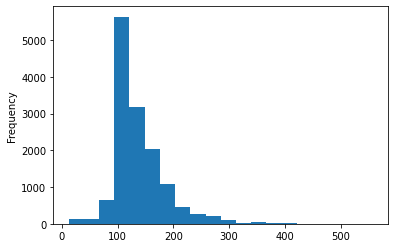

In [12]:
co2 = cars['INFCO2'].dropna().astype('int').plot.hist(bins=20)